# WEBSITE OWNERSHIP NETWORK ANALYSIS

A script to help determine who owns a website, by mapping out the entire network and finding contacts.

Realises on data in Domain BigData to draw a network of website ownership direct-links. 



### IMPORTS

In [ ]:
# libraries
import requests
from bs4 import BeautifulSoup, Tag
import numpy as np
import matplotlib.pyplot as plt
import re
import pandas as pd
import networkx as nx

In [1251]:
### !!! IMPORTANT !!! ONLY WANT NON-GENERIC NODES.  
# 'Whoisguard Protected' etc WILL MAKE THIS TOO MESSY TO COMPREHEND - AND ADD NO VALUE
### RUN THROUGH AND ADD EXTRA TERMS TO THE EXCLUDE LIST TO HELP REFINE THE SEARCH

exclude = ['abuse@namecheap.com', 'Whoisguard Inc', 'Whoisguard Protected', 'Domain Admin', 'Privacy Protect Llc (privacyprotect.org)', '\n', '+1.6613102107', 'Ddd','Domain Registries Foundation','REDACTED FOR PRIVACY','Domain Admin / This Domain Is For Sale','Perfect Privacy Llc','Data Protected Data Protected','Registration Private',\
'contact@privacyprotect.org','Contact Privacy Inc. Customer 0141346021','Domain Administrator','Domain Manager','Na','******** ********','Domains By Proxy Llc','Data Protected',\
'Hosting','Synergy Technologies Llc', '+33.170377666', '+33.143730576', 'Obfuscated whois Gandi-63-65 boulevard Massena', '+1.8022274003', 'San jose, Costa Rica', 'rger', '10 Corporate Drive', 'synergy@synergytech.com', 'Redacted For Privacy', '+1.4806242505', '+1.5555555555', '+1.3214551', 'abuse@godaddy.com',\
'Bahnhofstrasse 8','+1.0000000000', '123 Data Protected', 'San Jose Costa Rica', '2635 Walnut Street','+1.3038930552','+1.4165358672','mbuck@logic-control.com','+1.720.496.0020',\
'Contact Privacy Inc. Customer 0141346021', 'surfsidecr.com(at)contactprivacy.com','96 Mowat Ave','+1.8667040252','+1.4165350123','Hunkins Waterfront Plaza Main Street, P.O. Box 556','+1.8697654496','+1.4252025160','san jose Amarilla', 'san jose san jose','Hugedomains.com','domains@hugedomains.com',]


### SITES TO NOT INCLUDE
## These sites generally don't fit what we are looking for.
### Some are probably owned by a different Mike BUck, for example
### Initially I thought that 'blue7979.com' was not in the network. But it is not a real site, mimics wc-investor.com  --- and is run by people who run other betting sites
### seems unlikely that these ones frombigfoot down are connected, but you never know

exclude_checklist = ['https://imeicloud.us','https://gurupropertymanagement.com', 'https://newenglandwoodworks.com','https://mikebuckphotography.com','https://albdistributors.com','https://ocsdec73.com',\
                     'https://bigfootcomputer.com','https://finsources.com','https://genevacommunitycenter.com',\
                     'https://mcbconsulting.com','https://deansfleamarketandfurniture.com','https://telxcellence.com', 'https://tiffanyandmichael.com','https://bucktheworld.com',\
                     'https://mcbfleetmanagementconsulting.com',\
                    'https://iuniqueoptique.com', 'https://cadpapers.com','https://centrodenegociosgye.com','https://terraccini.com',\
                     'https://zonabienes.com','https://eyeuniqueoptique.com','https://imagetipspanama.com','https://eyeunique.com', 'https://iuniqueoptique.com', ]


In [1252]:
# THIS IS THE CHECKLIST OF SITES THAT WE WANT TO START WITH
checklist = ['https://www.betzona.cc',\
            'https://www.caribebet.cc',\
            'https://www.flashbet.cc',\
            'https://mustangbet.cc',\
            'https://luckydog.in',\
            'https://oceanside247.com',\
            'https://sportsaction77.com']

## FUNCTIONS

In [1253]:
### FOR DRAWING THE GRAPHS
# Note: the colouring conditions are hand-coded in here

G = nx.Graph()
contact_list = []

def colorGraph(height):
    
    color_map = []
    
    for node in G:
        if ".cc" in node:
            color_map.append('green')
        elif node == 'luckydog.in' or node == 'oceanside247.com':
            color_map.append('orange')            
        elif "@" in str(node) or "(at)" in str(node) or "+" in str(node):            #highlights web addresses
            color_map.append('yellow')
            contact_list.append(node)
        elif ".com" in str(node) or ".net" in str(node) or ".org" in str(node) or ".in" in str(node) or ".me" in str(node) or ".us" in str(node) or ".kr" in str(node)  or ".xyz" in str(node): 
            color_map.append('silver')
        else:
            color_map.append('blue')
            contact_list.append(node)
            
    plt.figure(1,figsize=(18,height)) 
    pos = nx.spring_layout(G,k=0.5,iterations=150)    
    nx.draw(G, pos, alpha=.6, with_labels=True, node_color=color_map, font_color="k")
    plt.show()

In [1254]:
## FOR FINDING EACH SITE'S RELEVANT REGISTRATION DETAILS, INCLUDING HISTORIC DETAILS

def DBDsites(site,s):
 
    url = "https://domainbigdata.com/" + s 
    page = requests.get(url)                                
    soup = BeautifulSoup(page.content, 'html.parser')
    
    def getInfo(idequals, dname, v1, bit_type):
        
        try:
            
            if bit_type == 'bit_soup':
                bit = soup.find(id=idequals)
            if bit_type == 'bit_historical':
                bit = historical[n].find(id=idequals)
            
            if v1 == 'TD1':    
                bit = bit.find_all("td")[1]
                
            if bit.find('a') != None:
                bit = bit.find("a")
                
                if dname == 'Registrant Name':
                    h = bit.get("href")
                    h = "https://domainbigdata.com" + h                    
                    identifiers_d[s]['Registrant Name URL'] = h
                    
                if dname == 'Registrant Organisation':
                    h = bit.get("href")
                    h = "https://domainbigdata.com" + h                    
                    identifiers_d[s]['Registrant Organisation URL'] = h
                    
                if dname == 'Historic Name 0':
                    h = bit.get("href")
                    h = "https://domainbigdata.com" + h                    
                    identifiers_d[s]['Historic Name 0 URL'] = h
                    
                if dname == 'Historic Org 0':
                    h = bit.get("href")
                    h = "https://domainbigdata.com" + h                    
                    identifiers_d[s]['Historic Org 0 URL'] = h 
                    
                if dname == 'Historic Name 1':
                    h = bit.get("href")
                    h = "https://domainbigdata.com" + h                    
                    identifiers_d[s]['Historic Name 1 URL'] = h
                    
                if dname == 'Historic Org 1':
                    h = bit.get("href")
                    h = "https://domainbigdata.com" + h                    
                    identifiers_d[s]['Historic Org 1 URL'] = h 
            
            bit = bit.contents[0]

        except:
            bit = None

        identifiers_d[s][dname] = bit
    
    getInfo("trRegistrantName", 'Registrant Name', 'TD1', 'bit_soup')
    getInfo('MainMaster_trRegistrantOrganization', 'Registrant Organisation', None, 'bit_soup')
    getInfo("trRegistrantEmail", 'Registrant Email', 'TD1', 'bit_soup')
    getInfo("trRegistrantTel", 'Registrant Phone', 'TD1', 'bit_soup')
    getInfo("trRegistrantAddress", 'Registrant Address', 'TD1', 'bit_soup')
    getInfo("trRegistrantFax", 'Registrant Fax', 'TD1', 'bit_soup')
    
    historical = soup.find_all(id='divRptHistoryMain')
    
    for n in range(0,len(historical)):
        getInfo("trRegistrantNameInRpt", 'Historic Name ' + str(n), 'TD1', 'bit_historical')
        getInfo('MainMaster_rptWhoisHistory_trRegistrantOrganizationInRpt_' + str(n), 'Historic Org ' + str(n), 'TD1', 'bit_historical')
        getInfo('trRegistrantEmailInRpt', 'Historic Email ' + str(n), 'TD1', 'bit_historical')
        getInfo('trRegistrantAddressInRpt', 'Historic Address ' + str(n), 'TD1', 'bit_historical')
        getInfo('trRegistrantTelInRpt', 'Historic Phone ' + str(n), 'TD1', 'bit_historical')
        getInfo('trRegistrantFaxInRpt', 'Historic Fax ' + str(n), 'TD1', 'bit_historical')
              
    print(url)

In [1255]:
## visualise
def whoOwnsViz():
    for item in ['Registrant Name','Registrant Organisation','Registrant Email','Registrant Phone', 'Registrant Address', 'Registrant Fax']:
        regNodes('Site',item)

    for item in ['Historic Name 0','Historic Org 0','Historic Email 0','Historic Phone 0', 'Historic Address 0']:
        regNodes('Site',item)

    for item in ['Historic Name 1','Historic Org 1','Historic Email 1','Historic Phone 1', 'Historic Address 1']:
        regNodes('Site',item)

In [1256]:
## ADDS HISTORY COLUMNS THAT MAY NOT HAVE BEEN NEEDED TO BE CREATED YET. ONLY NEEDED THE FIRST TIME AROUND USUALLY

def addHistCols(term):
    if 'Historic ' + term + ' 1' not in identifiersDF.columns:
        identifiersDF['Historic ' + term + ' 1'] = None
        identifiersDF['Historic ' + term + ' 1 URL'] = None


In [1257]:
## FOR ATTACHING REGISTATION INFO TO SITES IN THE GRAPH

def regNodes(field1, field2):
    
        temp = identifiersDF[[field1, field2]].dropna()
        temp = temp[temp[field2].isin(exclude) == False]
    
        for index, row in temp.iterrows():
            a = row[field1]
            b = row[field2]
            G.add_edge(a,b)

In [1258]:
### ONCE YOU ESTABLISH A SITE'S OWNER, THIS WILL FIND OUT WHAT ELSE THEY OWN

def ownerNodes(fieldURL, fieldNODE):
    
    temp = identifiersDF[[fieldURL, fieldNODE]].dropna()
    temp = temp[temp[fieldNODE].isin(exclude) == False]

    temp_d = {}
    for index, row in temp[[fieldNODE,fieldURL]].dropna().iterrows():
            a = row[fieldURL]
            b = row[fieldNODE]
            temp_d[a] = b
            
    def DBDowner(url, node):
        page = requests.get(url)                                
        soup = BeautifulSoup(page.content, 'html.parser')
        j = soup.find_all(id='aDomain')
        for i in j:
            site = i.contents[0]
            G.add_edge(site, node)  
            checklist.append('https://' + site)   #### add these sites to the checklist because we need to check all of them for owners
            
    for url, node in temp_d.items():
        DBDowner(url, node)
            

In [1259]:
def DBDowner(url, node):
    page = requests.get(url)                                
    soup = BeautifulSoup(page.content, 'html.parser')
    j = soup.find_all(id='aDomain')
    for i in j:
        site = i.contents[0]
        G.add_edge(site, node)  
        checklist.append('https://' + site)   #### add these sites to the checklist because we need to check all of them for owners
   

## RUN THE CODE

### STARTING OUT 
A basic graph showing what we know at the start of this investigation.

In [1260]:
### MANUALLY ADDING RELEVANT EDGES TO GET THIS STARTED

G.add_edge('flashbet.cc','oceanside247.com')                         #COPYRIGHT OCEANSIDE247.COM FOUND IN CODE
G.add_edge('caribebet.cc','oceanside247.com')                    
G.add_edge('mustangbet.cc','oceanside247.com')
G.add_edge('betzona.cc','oceanside247.com')
G.add_edge('mustangbet.cc','luckydog.in')                            #USES STYLESHEET FROM LUCKYDOG.IN - AND LOOKS THE SAME
G.add_edge('luckydog.in','sportsaction77.com')                       #USES STYLESHEET FROM SPORTSACTION77.COM - AND LOOKS THE SAME
G.add_edge('oceanside247.com','sportsaction77.com')

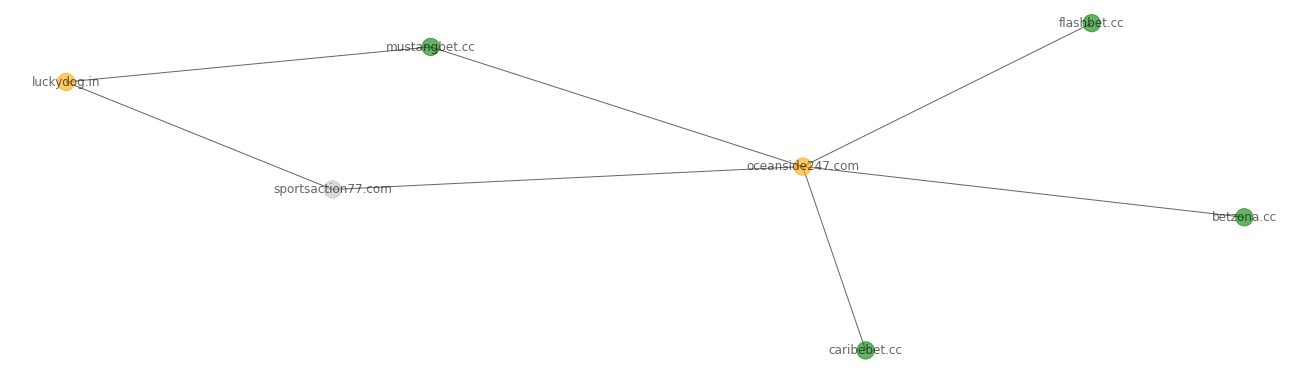

In [1261]:
colorGraph(5)

### WHO OWNS THESE SITES?

Running these sites through DomainBigData, and charting them into the network visualisation.

In [1262]:
identifiers_d = {}
for site in checklist:
    s = site.replace('https','').replace('http','').replace('://','').replace('www.','').replace('/','')
    identifiers_d[s] = {}
    DBDsites(site,s)
identifiersDF = pd.DataFrame.from_dict(identifiers_d).T
identifiersDF['Site'] = identifiersDF.index               ## makes the network analysis easier to refer to a clumn value, not an index value

https://domainbigdata.com/betzona.cc
https://domainbigdata.com/caribebet.cc
https://domainbigdata.com/flashbet.cc
https://domainbigdata.com/mustangbet.cc
https://domainbigdata.com/luckydog.in
https://domainbigdata.com/oceanside247.com
https://domainbigdata.com/sportsaction77.com


In [1263]:
## ONLY NEEDED THE FIRST TIME AROUND USUALLY. ADDS HISTORY 1 COLUMNS IF THEY ARENT IN THERE ALREADY

identifiersDF['Registrant Address'] = None

for item in ['Name', 'Org', 'Email', 'Phone', 'Address', 'Fax']:
    addHistCols(item)

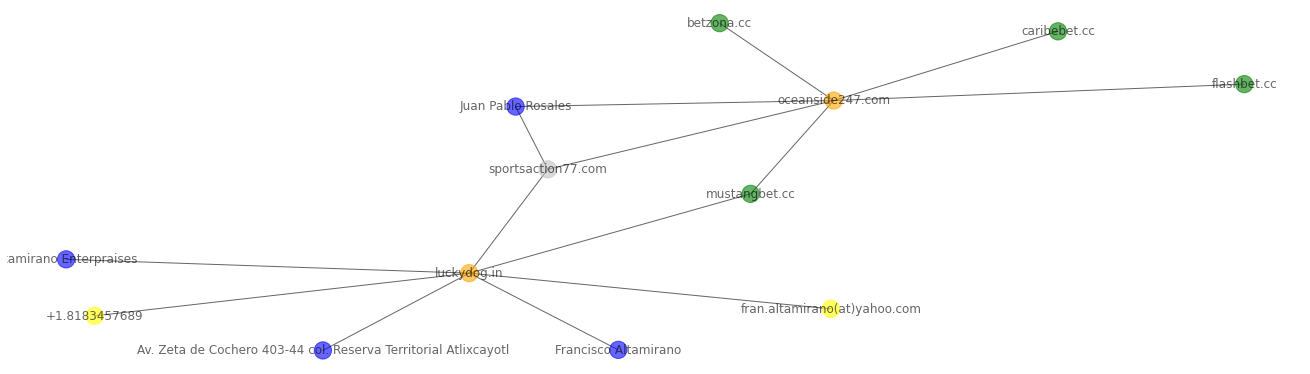

In [1264]:
# VISUALISE
whoOwnsViz()
colorGraph(5)

### EXPANDING THE NETWORK

Now that we know the names of the owners, we can see what others sites they own

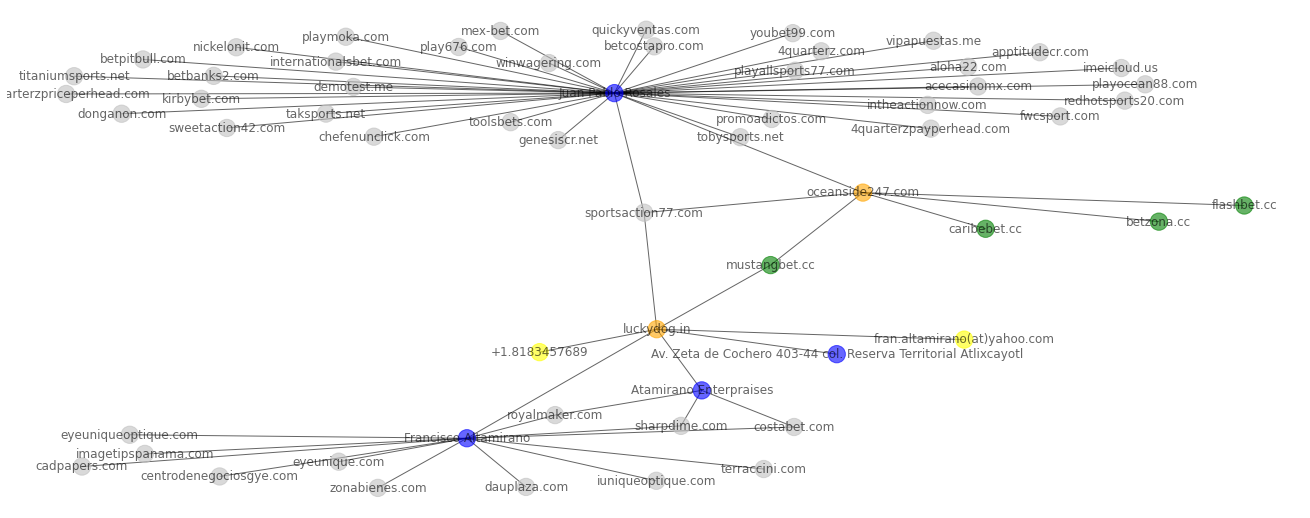

In [1265]:
### ADD? : 'Registrant Email', 'Registrant Phone', 'Registrant Address','Registrant Fax',

for item in ['Registrant Name', 'Registrant Organisation',  'Historic Name 0', 'Historic Org 0', 'Historic Name 1','Historic Org 1']:
    ownerNodes(item + ' URL', item)

colorGraph(7)

### WHOIS???
Here are the contacts we have harvested so far. 
I have left repeats in, as they give some idea 

In [1266]:
list(np.unique(contact_list))

['+1.8183457689',
 'Atamirano Enterpraises',
 'Av. Zeta de Cochero 403-44 col. Reserva Territorial Atlixcayotl',
 'Francisco Altamirano',
 'Juan Pablo Rosales',
 'fran.altamirano(at)yahoo.com']

In [1267]:
len(checklist)

78

# NOW RUN IT ALL OVER AGAIN

Now that you have expanded the list of websites to check, it's time to start this process over again.

In [1268]:
### starting with a little clean up of the checklist

l = []
for x in checklist:
    if x not in l:
        l.append(x)
checklist = l
print(len(checklist))

checklist = [x for x in checklist if x not in exclude_checklist]
print(len(checklist))

54
45


In [1269]:
x = list(identifiersDF['Site'])
y = [z.split('//')[1].replace('www.','').replace('/','') for z in checklist]
new = [i for i in y if i not in x]
print(len(new))

for site in new:
    s = site.replace('https','').replace('http','').replace('://','').replace('www.','').replace('/','')
    identifiers_d[s] = {}
    DBDsites(site,s)
identifiersDF = pd.DataFrame.from_dict(identifiers_d).T
identifiersDF['Site'] = identifiersDF.index               ## makes the network analysis easier to refer to a clumn value, not an index value

38
https://domainbigdata.com/royalmaker.com
https://domainbigdata.com/dauplaza.com
https://domainbigdata.com/sharpdime.com
https://domainbigdata.com/costabet.com
https://domainbigdata.com/apptitudecr.com
https://domainbigdata.com/genesiscr.net
https://domainbigdata.com/play676.com
https://domainbigdata.com/playallsports77.com
https://domainbigdata.com/playocean88.com
https://domainbigdata.com/quickyventas.com
https://domainbigdata.com/winwagering.com
https://domainbigdata.com/youbet99.com
https://domainbigdata.com/4quarterzpayperhead.com
https://domainbigdata.com/4quarterzpriceperhead.com
https://domainbigdata.com/internationalsbet.com
https://domainbigdata.com/titaniumsports.net
https://domainbigdata.com/aloha22.com
https://domainbigdata.com/mex-bet.com
https://domainbigdata.com/kirbybet.com
https://domainbigdata.com/betcostapro.com
https://domainbigdata.com/sweetaction42.com
https://domainbigdata.com/tobysports.net
https://domainbigdata.com/donganon.com
https://domainbigdata.com/4qua

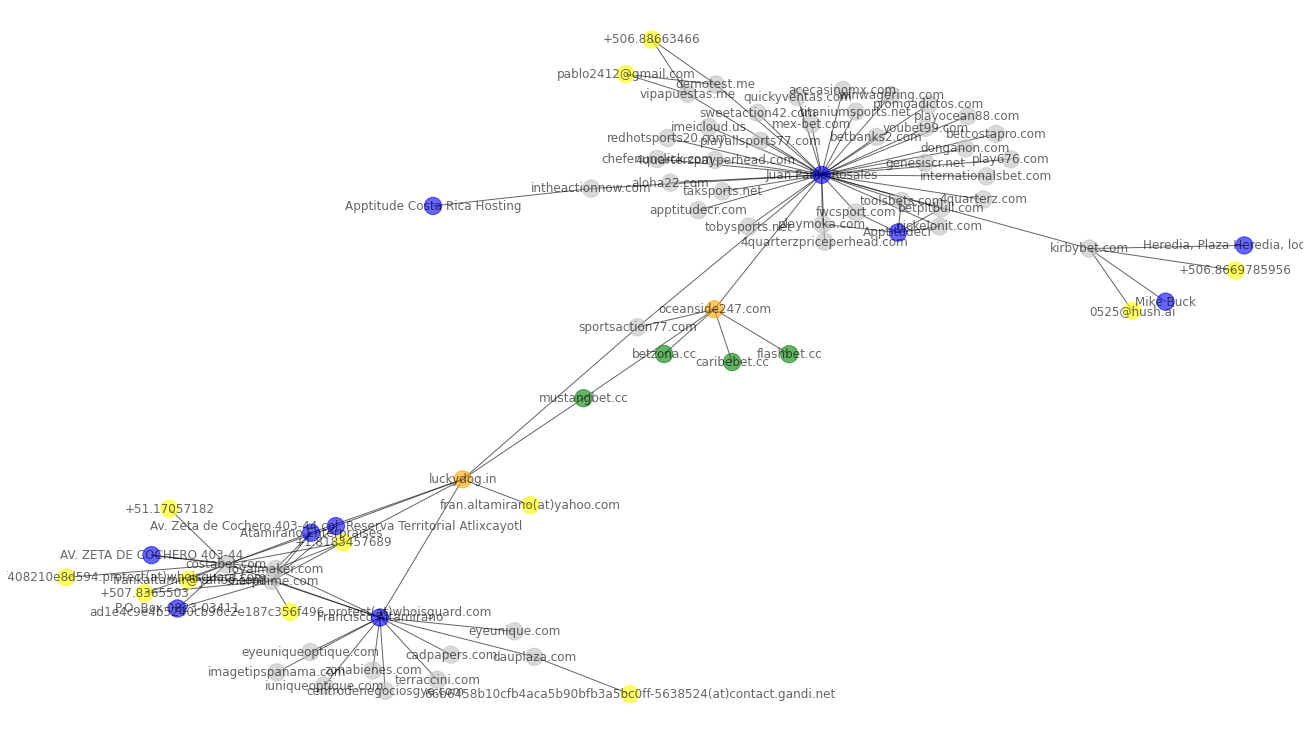

In [1270]:
#visualise
whoOwnsViz()
colorGraph(10)

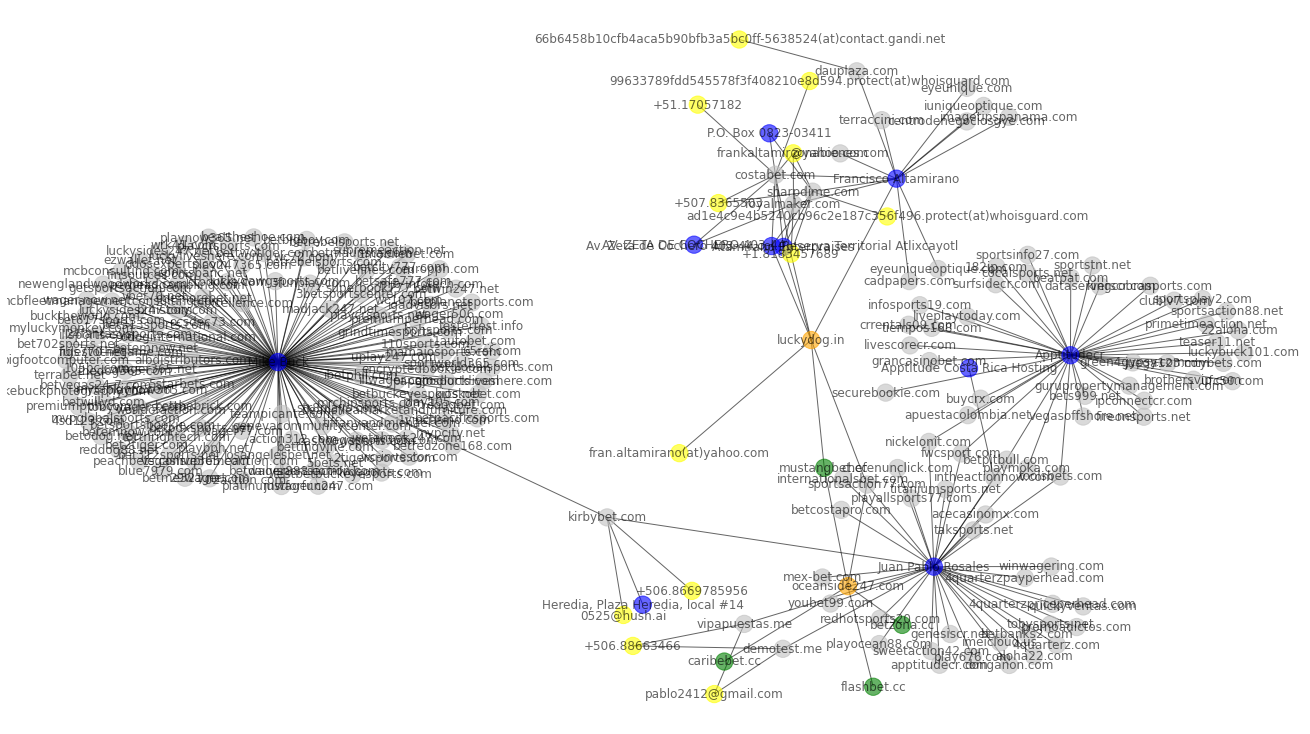

In [1271]:
# EXPAND THE NETWORK

for item in ['Registrant Name', 'Registrant Organisation', 'Historic Name 0', 'Historic Org 0', 'Historic Name 1','Historic Org 1']:
    ownerNodes(item + ' URL', item)

colorGraph(10)

Now we have a list of contacts we can use to try to find the owner of those sites we originally looked at. What seemed like a hopeless task can now be done in minutes.

In [1272]:
list(np.unique(contact_list))

['+1.8183457689',
 '+506.8669785956',
 '+506.88663466',
 '+507.8365503',
 '+51.17057182',
 '0525@hush.ai',
 '66b6458b10cfb4aca5b90bfb3a5bc0ff-5638524(at)contact.gandi.net',
 '99633789fdd545578f3f408210e8d594.protect(at)whoisguard.com',
 'AV. ZETA DE COCHERO 403-44',
 'Apptitude Costa Rica Hosting',
 'Apptitudecr',
 'Atamirano Enterpraises',
 'Av. Zeta de Cochero 403-44 col. Reserva Territorial Atlixcayotl',
 'Francisco Altamirano',
 'Heredia, Plaza Heredia, local #14',
 'Juan Pablo Rosales',
 'Mike Buck',
 'P.O. Box 0823-03411',
 'ad1e4c9e4b5240cb96c2e187c356f496.protect(at)whoisguard.com',
 'fran.altamirano(at)yahoo.com',
 'frankaltamir@yahoo.com',
 'pablo2412@gmail.com']

In [1273]:
len(checklist)

426

## THIRD TIME 

What you already have is probably more than enough, but you can keep going.

In [1274]:
### clean up checklist

l = []
for x in checklist:
    if x not in l:
        l.append(x)
checklist = l
print(len(checklist))

checklist = [x for x in checklist if x not in exclude_checklist]
print(len(checklist))

227
204


In [1275]:
# Some Mike Buck sites I found elsewhere

add_list = ['https://sickwager.com','https://superbook888.com','https://allweeksports.com','https://bet617sports.com','https://3bet38.com/','https://pis.ag',]
for item in add_list:
    if item not in checklist:
        checklist.append(item)
        
len(checklist)

209

In [1276]:
x = list(identifiersDF['Site'])
y = [z.split('//')[1].replace('www.','').replace('/','') for z in checklist]
new = [i for i in y if i not in x]
print(len(new))

for site in new:
    s = site.replace('https','').replace('http','').replace('://','').replace('www.','').replace('/','')
    identifiers_d[s] = {}
    DBDsites(site,s)
identifiersDF = pd.DataFrame.from_dict(identifiers_d).T
identifiersDF['Site'] = identifiersDF.index               ## makes the network analysis easier to refer to a clumn value, not an index value

164
https://domainbigdata.com/surfsidecr.com
https://domainbigdata.com/brothersvip.com
https://domainbigdata.com/22aloha.com
https://domainbigdata.com/primetimeaction.net
https://domainbigdata.com/ufc50.com
https://domainbigdata.com/securebookie.com
https://domainbigdata.com/luckybuck101.com
https://domainbigdata.com/juega123.com
https://domainbigdata.com/green4gypsy.com
https://domainbigdata.com/teaser11.net
https://domainbigdata.com/sportstnt.net
https://domainbigdata.com/clublv7.com
https://domainbigdata.com/mtybets.com
https://domainbigdata.com/beatpat.com
https://domainbigdata.com/kingcobrasports.com
https://domainbigdata.com/sportsaction88.net
https://domainbigdata.com/cocalsports.net
https://domainbigdata.com/sportsplay2.com
https://domainbigdata.com/grancasinobet.com
https://domainbigdata.com/bets999.net
https://domainbigdata.com/vegasoffshore.net
https://domainbigdata.com/apuestacolombia.net
https://domainbigdata.com/buycrx.com
https://domainbigdata.com/tiempos168.com
https://

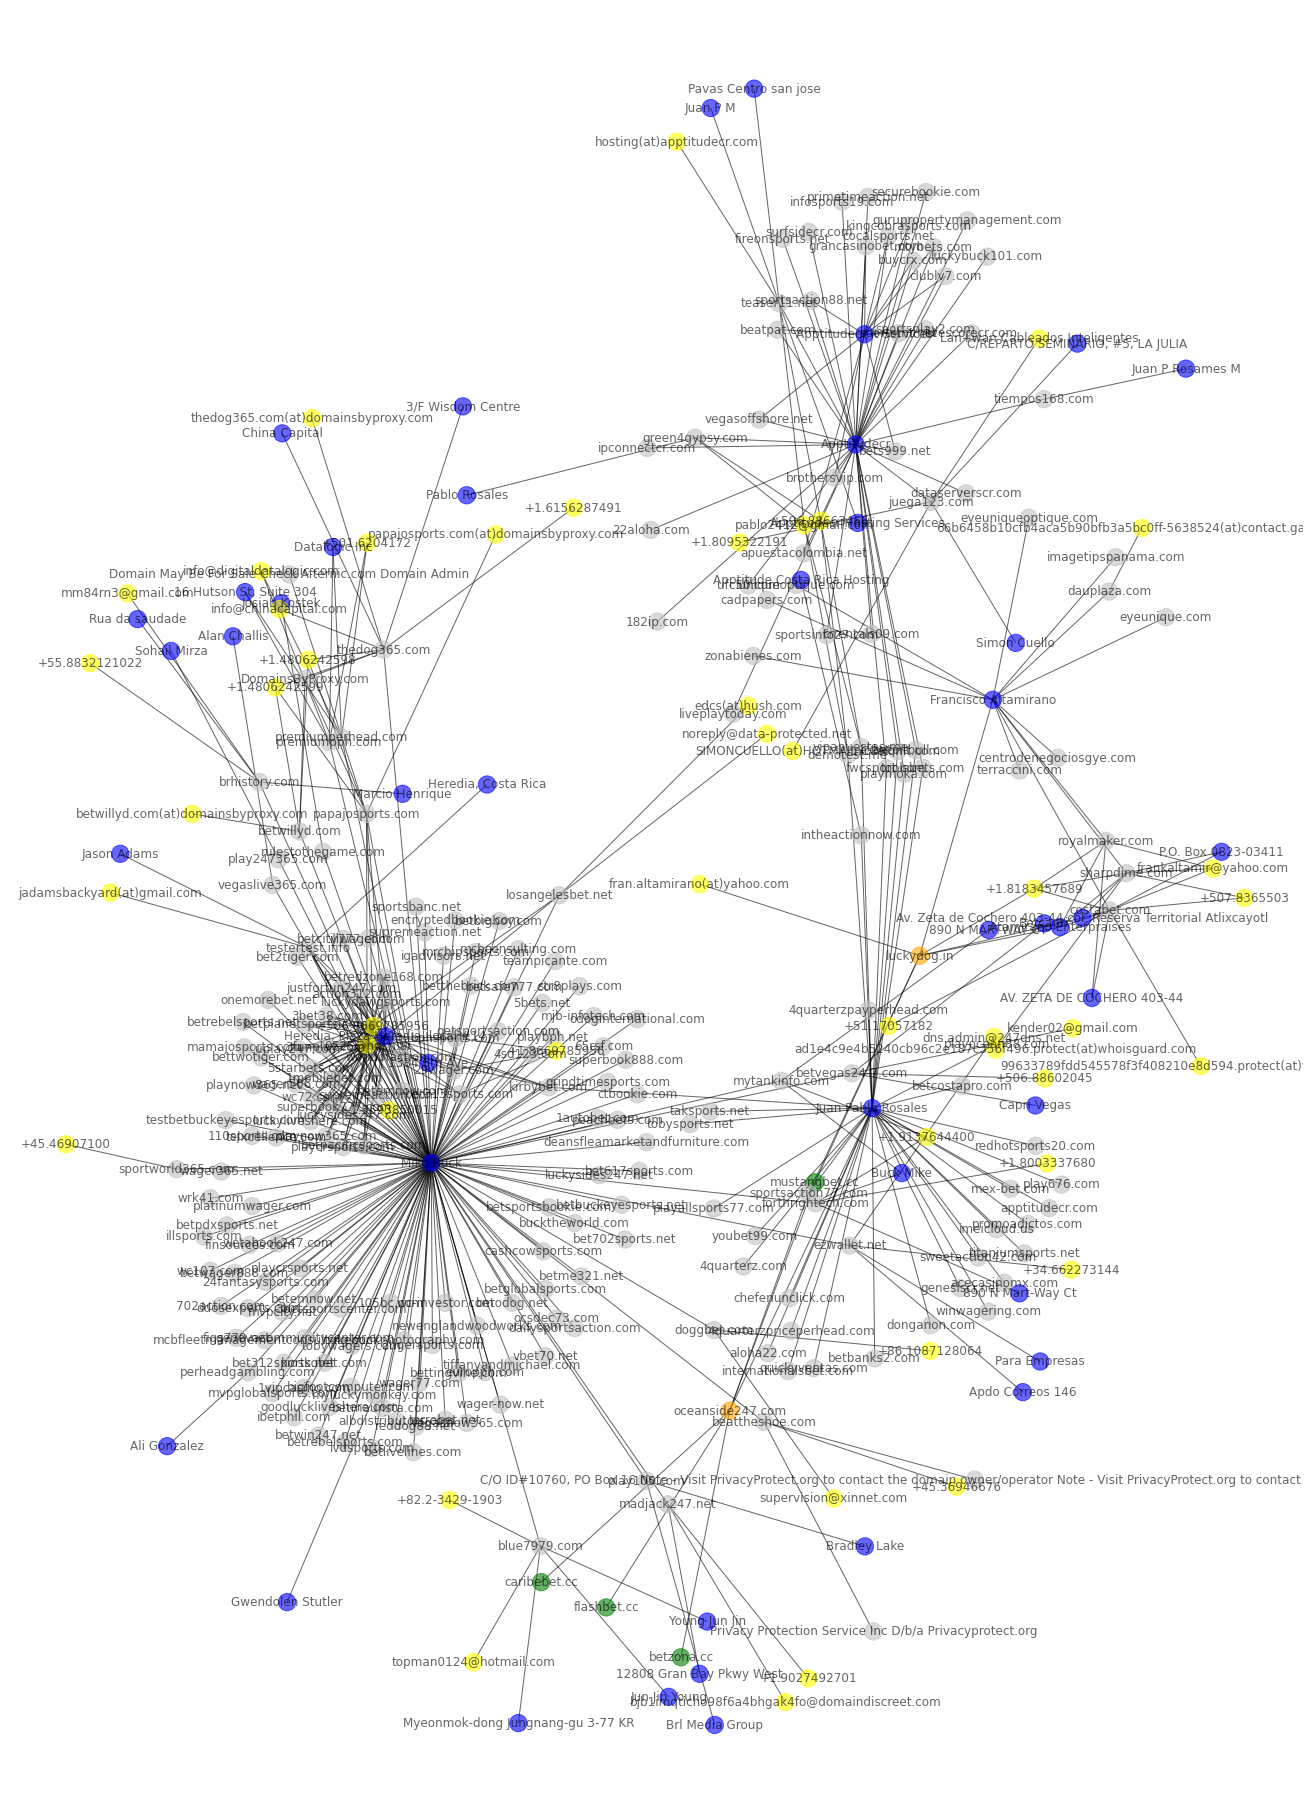

In [1277]:
### VISUALISE 

whoOwnsViz()
colorGraph(25)

In [1278]:
identifiersDF.shape

(209, 61)

## GO BESPOKE

From here, I would like to proceed with more caution - to stop it getting too messy, and because there are only a few end points that I would like to look at.

Find the node you want to add. Search for it in https://domainbigdata.com/ Once you get to the right page, copy the URL.

then past into this formula and copy below DBDowner(fieldURL, fieldNODE)

(fieldNODE has to equal the node you searching for)


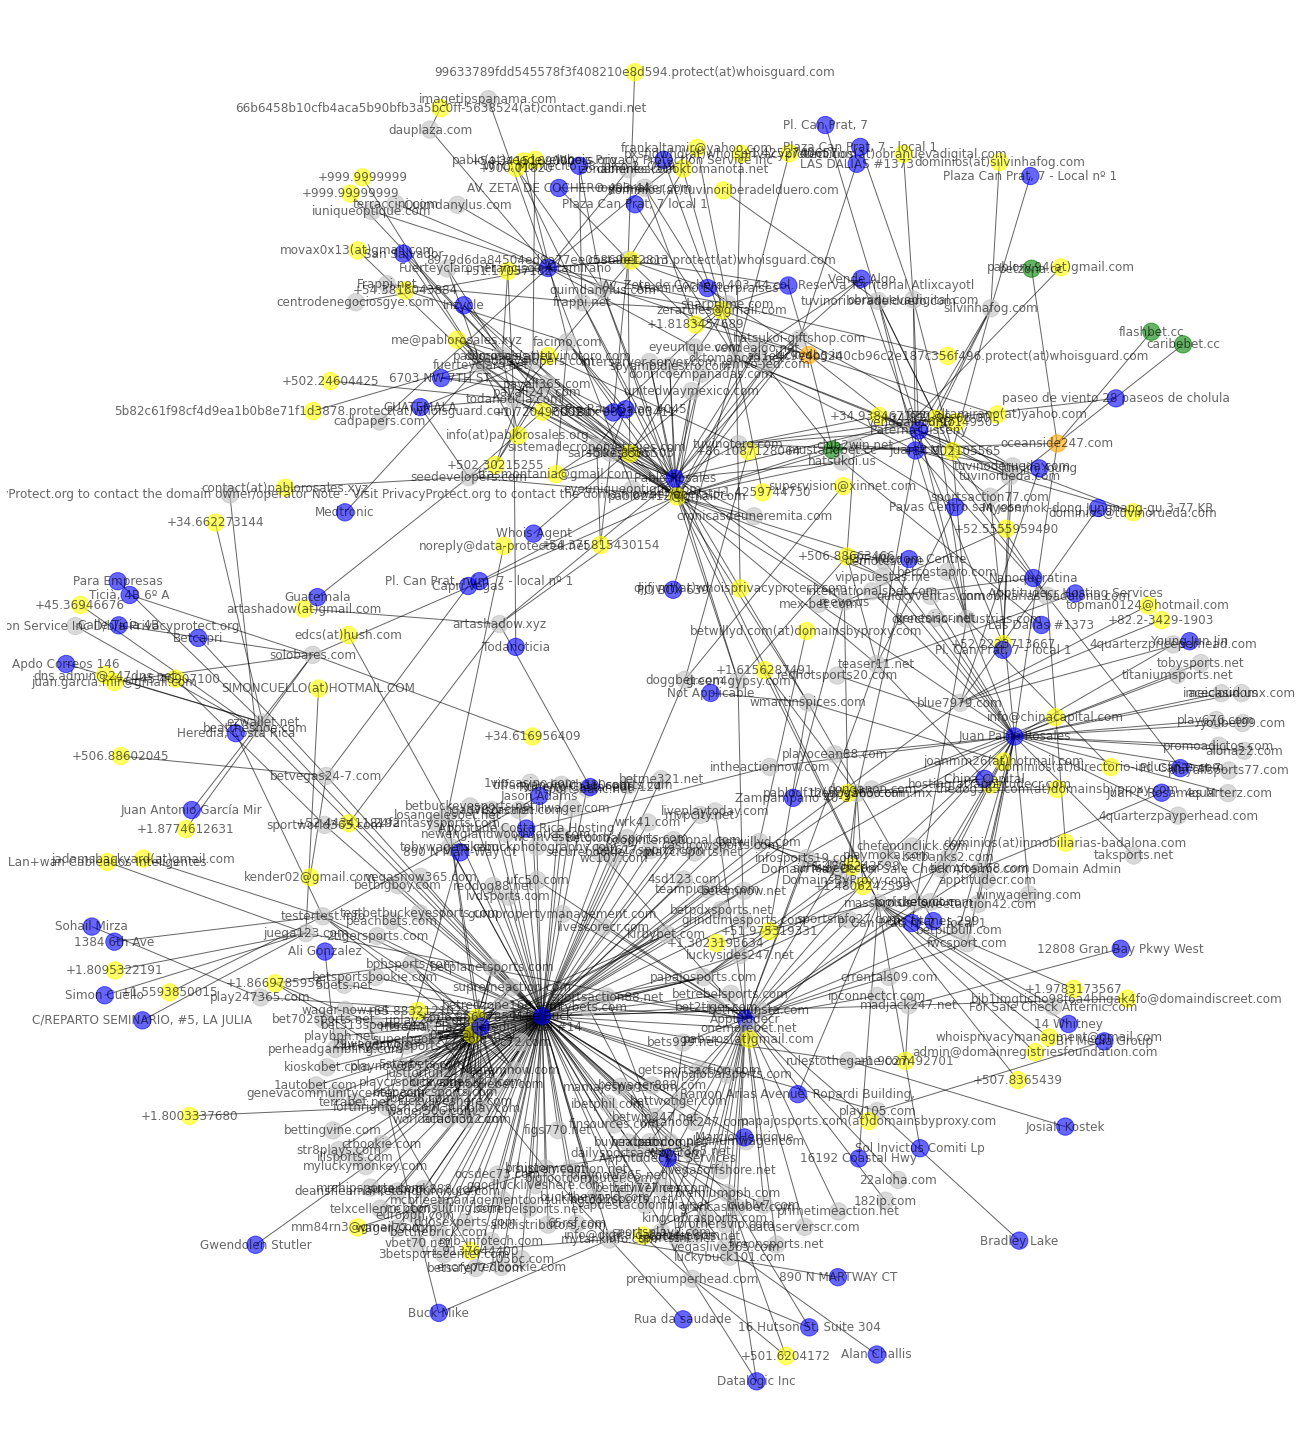

In [1287]:
DBDowner('https://domainbigdata.com/nj/Qxhz5u_t7Fn26Zza1YPgyw', 'Juan P M')
DBDowner('https://domainbigdata.com/nj/tUd3nzIhz9q9FWqIJj762w', 'pablo2412@gmail.com')

colorGraph(20)

In [1291]:
a = list(G.neighbors('Buck Mike'))
a

['forthrightech.com', 'mytankinfo.com']

### AND ONE LAST LOOK AT WHAT WE GET FROM THE BESPOKE NODES EXPLORATION

In [1282]:
### clean up checklist

l = []
for x in checklist:
    if x not in l:
        l.append(x)
checklist = l
len(checklist)

checklist = [x for x in checklist if x not in exclude_checklist]
len(checklist)

246

In [1283]:
x = list(identifiersDF['Site'])
y = [z.split('//')[1].replace('www.','').replace('/','') for z in checklist]
new = [i for i in y if i not in x]
print(len(new))

for site in new:
    s = site.replace('https','').replace('http','').replace('://','').replace('www.','').replace('/','')
    identifiers_d[s] = {}
    DBDsites(site,s)
identifiersDF = pd.DataFrame.from_dict(identifiers_d).T
identifiersDF['Site'] = identifiersDF.index               ## makes the network analysis easier to refer to a clumn value, not an index value

37
https://domainbigdata.com/directorio-industrias.com
https://domainbigdata.com/inmobiliarias-badalona.com
https://domainbigdata.com/silvinhafog.com
https://domainbigdata.com/tuvinoriberadelduero.com
https://domainbigdata.com/tuvinorueda.com
https://domainbigdata.com/tuvinotoro.com
https://domainbigdata.com/tuvinoderueda.com
https://domainbigdata.com/club2win.net
https://domainbigdata.com/oktomanota.net
https://domainbigdata.com/obranuevadigital.com
https://domainbigdata.com/masspro.us
https://domainbigdata.com/unitedwaymexico.com
https://domainbigdata.com/hatsukoi.us
https://domainbigdata.com/vendealgo.info
https://domainbigdata.com/cronicasdeuneremita.com
https://domainbigdata.com/sistemadecronometrajes.com
https://domainbigdata.com/vendealgo.net
https://domainbigdata.com/donricoempanadas.com
https://domainbigdata.com/remco-led.com
https://domainbigdata.com/reevo.us
https://domainbigdata.com/payall247.com
https://domainbigdata.com/payall365.com
https://domainbigdata.com/interserver-

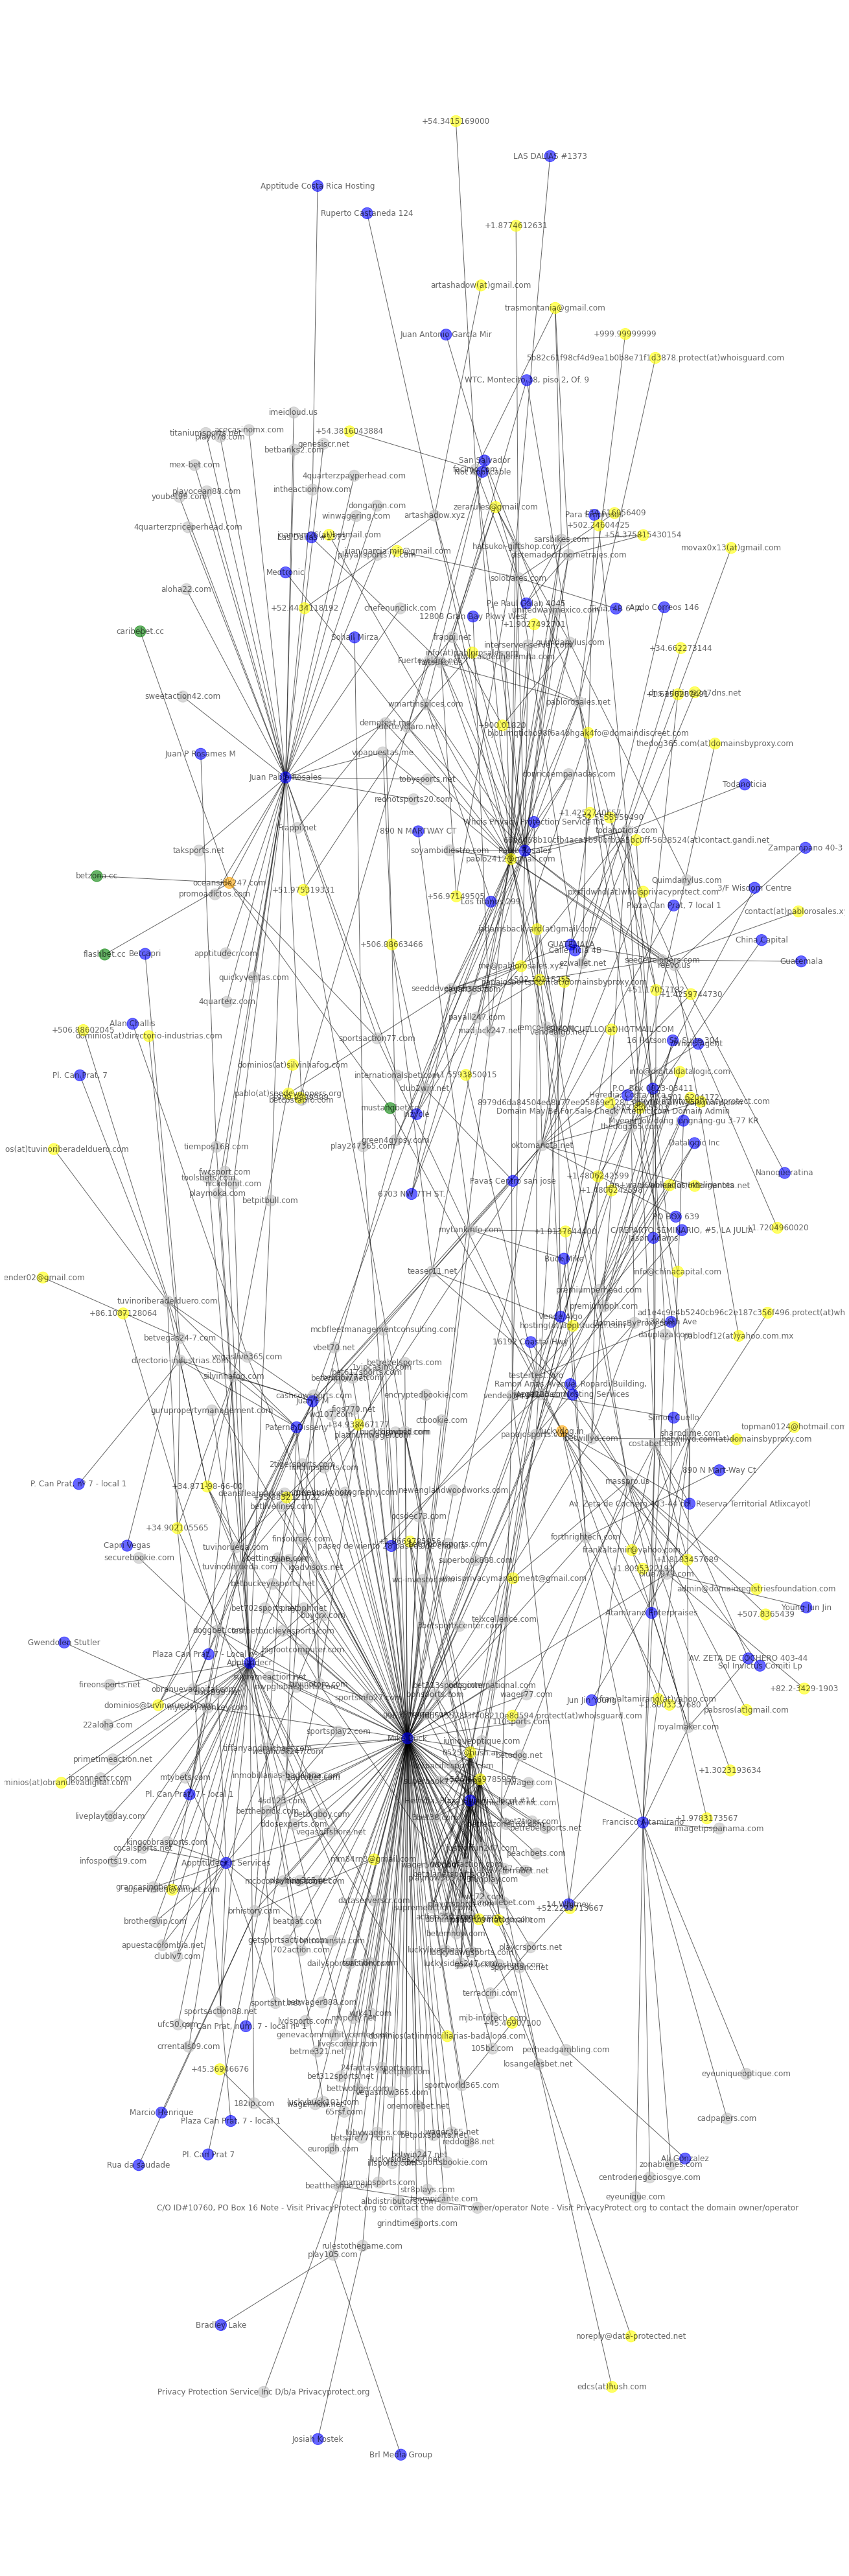

In [1284]:
### VISUALISE 

whoOwnsViz()
colorGraph(55)

In [1289]:
list(np.unique(contact_list))

['+1.3023193634',
 '+1.4252740657',
 '+1.4259744730',
 '+1.4806242598',
 '+1.4806242599',
 '+1.5593850015',
 '+1.6156287491',
 '+1.7204960020',
 '+1.8003337680',
 '+1.8095322191',
 '+1.8183457689',
 '+1.8669785956',
 '+1.8774612631',
 '+1.9027492701',
 '+1.9137644400',
 '+1.9783173567',
 '+34.616956409',
 '+34.662273144',
 '+34.871-98-66-00',
 '+34.902105565',
 '+34.938467177',
 '+45.36946676',
 '+45.46907100',
 '+501.6204172',
 '+502.24604425',
 '+502.30215255',
 '+506.8669785956',
 '+506.88602045',
 '+506.88663466',
 '+507.8365439',
 '+507.8365503',
 '+51.17057182',
 '+51.975319331',
 '+52.2223713667',
 '+52.4434118192',
 '+52.5555959490',
 '+54.3415169000',
 '+54.375815430154',
 '+54.3816043884',
 '+55.8832121022',
 '+56.97149505',
 '+82.2-3429-1903',
 '+86.1087128064',
 '+900.01820',
 '+999.9999999',
 '+999.99999999',
 '0525@hush.ai',
 '12808 Gran Bay Pkwy West',
 '1384 6th Ave',
 '14 Whitney',
 '16 Hutson St, Suite 304',
 '16192 Coastal Hwy',
 '3/F Wisdom Centre',
 '5b82c61f98cf4d

### MAP OUT THE ROUTE BETWEEN TWO NODES

In [1286]:
pointA = 'pablo2412@gmail.com'
pointB = 'Mike Buck'

paths = nx.all_simple_paths(G, source=pointA , target=pointB, cutoff=4)
p = list(paths)
for i in p:
    print(i)

['pablo2412@gmail.com', 'demotest.me', 'Juan Pablo Rosales', 'kirbybet.com', 'Mike Buck']
['pablo2412@gmail.com', 'vipapuestas.me', 'Juan Pablo Rosales', 'kirbybet.com', 'Mike Buck']
